Hi! this is a simple Python program which can be used to compress the size of an image. Here, in this program we'll have to provide an image(or URL address for accessing in cloud storage) and a location where you have to save the  compress image. This program is based on a simple Machine Learning technique known as Dimension Reduction and its working on Image processing has been done using Open CV.

Drawback :- The compressed size of the image is so random. Some time it is half of the original size of the image an dsome time it so no effect.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

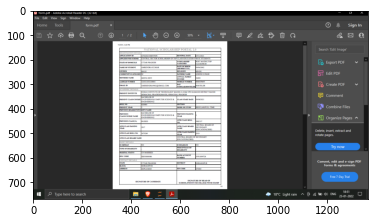

In [ ]:
# path = "/elephant.jpg"
path = "/Screenshot (151).png"
img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
b, r, g = cv2.split(img)
r_scaled = r/255
b_scaled = b/255
g_scaled = g/255

In [ ]:
pca_b = PCA(n_components=50)
pca_b.fit(b_scaled)
trans_pca_b = pca_b.transform(b_scaled)
pca_g = PCA(n_components=50)
pca_g.fit(g_scaled)
trans_pca_g = pca_g.transform(g_scaled)
pca_r = PCA(n_components=50)
pca_r.fit(r_scaled)
trans_pca_r = pca_r.transform(r_scaled)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


uint8


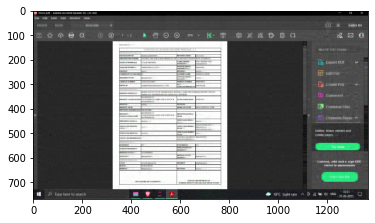

In [ ]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
img_reduced = np.full(img.shape, 1, np.uint8)
print(img_reduced.dtype)
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
plt.imshow(img_reduced)

In [ ]:
def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()
    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

In [ ]:
img_reduced = convert(img_reduced, 0, 255, np.uint8)
print(img_reduced.dtype)

uint8


In [ ]:
filename = "/content/a.jpg" #Give the path where the reduced size image is to be stored with attached to name of image you like to give it(For ex here its name is "a.jpg")
rgbImg = cv2.cvtColor(img_reduced, cv2.COLOR_BGR2RGB)
res = cv2.imwrite(filename,rgbImg) #Here we are saving the reduced image to the given path.
if(res==True):
    print("Yes the compressed image has been successfully saved to given location")
else:
    print("Sad! the program failEd. Try to check th eabove filled location detail or simply give other directory location.")

Yes the compressed image has been successfully saved to given location
